In [1]:
# 图片可视化

import matplotlib.pyplot as plt
import json
import os
from PIL import Image
from torchvision import datasets
import random
import numpy as np
os.makedirs('../data/check_images/',exist_ok=True)

data_dir = '../data/'
fashionmnist_dataset = datasets.FashionMNIST(data_dir, train=False, download=True)
fashionmnist_classes = ['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

with open('label_index.json','w') as file:
    json.dump(
        {t:idx for idx , t in enumerate(fashionmnist_classes)},file,indent=4,ensure_ascii=False
    )


/Users/zhongyupei/miniconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


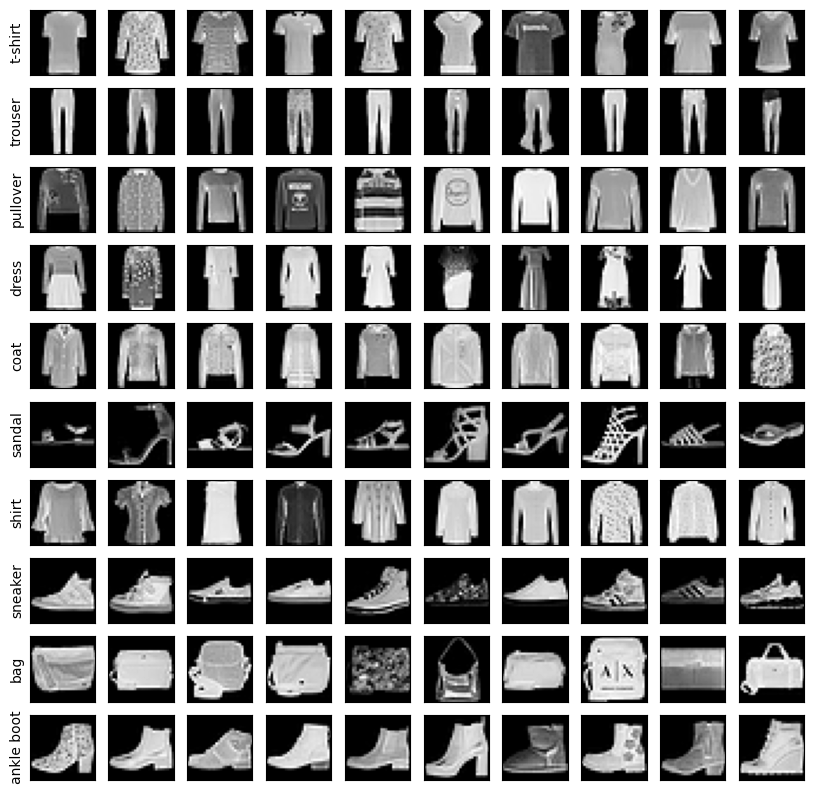

In [6]:
# 展示FashionMNIST
type2idx = {}
for i in range(10):
    type2idx[fashionmnist_classes[i]] = [idx for idx,(_,label) in enumerate(fashionmnist_dataset) if label == i]    

# 展示动物图片
# 创建 10x10 的子图网格
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
# 展示每张图片
for i in range(10):
    label_name = fashionmnist_classes[i]
    image_idx_list = type2idx[label_name]
    image_idx_list = np.random.choice(image_idx_list,size=10,replace=False).tolist()
    for j in range(10):
        if j==0:
            axs[i,j].set_ylabel(label_name)
            axs[i,j].yaxis.set_label_position('left')

        print

        image,_ = fashionmnist_dataset[image_idx_list[j]]
        axs[i, j].imshow(image,cmap='gray')  # 展示灰度图像
        # axs[i, j].axis('off')  # 关闭坐标轴
        axs[i, j].set_xticks([])  # 不显示刻度
        axs[i, j].set_yticks([])  # 不显示刻度
plt.show()

# 输出几张系统图片用于检测
for i in range(10):
    label_name = fashionmnist_classes[i]
    image_idx_list = type2idx[label_name]
    image_idx = np.random.choice(image_idx_list,size=1,replace=False)[0]
    image, _ = fashionmnist_dataset[image_idx]
    image.save(f'../data/check_images/fashionmnist_{label_name}.jpg')
